This file contains function in order to get different statistical inference of BDD100k dataset. To know more about the dataset visit: https://doc.bdd100k.com/format.html#object-detection

1. Calculate the number of images present in train and validation w.r.t attribute.
2. Find if any train image donot have corresponding labels. If yes then move those images.
3. Visuliazation of the dataset with bounding boxes (BB).
4. Check if dataset is imbalance w.r.t classes and samples.
5. Blur image detection.
6. Find images where the trafficlightcolor is none for category traffic light.
7. Check the variation in image sizes.

# Import libraries

In [2]:
import os
import json
import cv2
import random
import shutil
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

from PIL import Image

# Path to valid and train images and labels

In [3]:
# Lables and images path
file_path_train = 'dataset/bdd100k_labels_release/bdd100k/labels/bdd100k_labels_images_train.json'
file_path_valid = 'dataset/bdd100k_labels_release/bdd100k/labels/bdd100k_labels_images_val.json'

images_folder_train = "dataset/bdd100k_images_100k/bdd100k/images/100k/train"
images_folder_val = "dataset/bdd100k_images_100k/bdd100k/images/100k/val"

#Classes under consideration
classes = ['bus', 'traffic light', 'traffic sign', 'person', 'bike', 'truck', 'motor', 'car', 'train', 'rider']

# 1. Calculate the number of images for train and validation
    1. Number of images for train w.r.t attribute
        - Use `train_data` to count images by attribute.
    2. Number of images for validation w.r.t attribute
        - Use `valid_data` to count images by attribute

# 1.1. Find the number of images for TRAIN w.r.t attribute

In [8]:
with open(file_path_train, 'r') as file:
    data = json.load(file)

# Initialize dictionaries to store counts for each attribute
weather_counts = {}
scene_counts = {}
timeofday_counts = {}

# Iterate through each item (image) in the data
for item in data:
    # Extract attributes for each image
    weather = item['attributes']['weather']
    scene = item['attributes']['scene']
    timeofday = item['attributes']['timeofday']
    
    # Update counts for weather
    weather_counts[weather] = weather_counts.get(weather, 0) + 1
    
    # Update counts for scene
    scene_counts[scene] = scene_counts.get(scene, 0) + 1
    
    # Update counts for time of day
    timeofday_counts[timeofday] = timeofday_counts.get(timeofday, 0) + 1

# Function to print counts and total
def print_counts_and_total(counts_dict, category_name):
    print(f"\n{category_name.capitalize()}:")
    total = 0
    for attribute, count in counts_dict.items():
        print(f"{attribute}: {count}")
        total += count
    print(f"Total images in {category_name}: {total}")

print("========================= Training Set =========================")

# Print counts and total for weather
print_counts_and_total(weather_counts, "weather")

# Print counts and total for scene
print_counts_and_total(scene_counts, "scene")

# Print counts and total for time of day
print_counts_and_total(timeofday_counts, "timeofday")


==============Training Set =========================

Weather:
clear: 37344
rainy: 5070
undefined: 8119
snowy: 5549
overcast: 8770
partly cloudy: 4881
foggy: 130
Total images in weather: 69863

Scene:
city street: 43516
highway: 17379
residential: 8074
parking lot: 377
undefined: 361
tunnel: 129
gas stations: 27
Total images in scene: 69863

Timeofday:
daytime: 36728
dawn/dusk: 5027
night: 27971
undefined: 137
Total images in timeofday: 69863


# 1.2. Find the number of images for VALID w.r.t attribute

In [9]:
with open(file_path_valid, 'r') as file:
    data = json.load(file)

# Initialize dictionaries to store counts for each attribute
weather_counts = {}
scene_counts = {}
timeofday_counts = {}

# Iterate through each item (image) in the data
for item in data:
    # Extract attributes for each image
    weather = item['attributes']['weather']
    scene = item['attributes']['scene']
    timeofday = item['attributes']['timeofday']
    
    # Update counts for weather
    weather_counts[weather] = weather_counts.get(weather, 0) + 1
    
    # Update counts for scene
    scene_counts[scene] = scene_counts.get(scene, 0) + 1
    
    # Update counts for time of day
    timeofday_counts[timeofday] = timeofday_counts.get(timeofday, 0) + 1

# Function to print counts and total
def print_counts_and_total(counts_dict, category_name):
    print(f"\n{category_name.capitalize()}:")
    total = 0
    for attribute, count in counts_dict.items():
        print(f"{attribute}: {count}")
        total += count
    print(f"Total images in {category_name}: {total}")

print("========================= Validation Set =========================")
# Print counts and total for weather
print_counts_and_total(weather_counts, "weather")

# Print counts and total for scene
print_counts_and_total(scene_counts, "scene")

# Print counts and total for time of day
print_counts_and_total(timeofday_counts, "timeofday")


==============Validation Set =========================

Weather:
overcast: 1239
clear: 5346
undefined: 1157
rainy: 738
snowy: 769
partly cloudy: 738
foggy: 13
Total images in weather: 10000

Scene:
city street: 6112
highway: 2499
tunnel: 27
residential: 1253
parking lot: 49
gas stations: 7
undefined: 53
Total images in scene: 10000

Timeofday:
daytime: 5258
night: 3929
dawn/dusk: 778
undefined: 35
Total images in timeofday: 10000


# 2. Find if any train image donot have corresponding labels. If yes then move those images
    1. Train images without corresponding labels
    2. If exist move those images to different folder
    3. Visulize those images without ground truth

# 2.1. Train images without lables

In [7]:
# Directory containing the images
images_folder = "dataset/bdd100k_images_100k/bdd100k/images/100k/train"

# Load the JSON data from train.json
with open(file_path_train, "r") as file:
    train_data = json.load(file)

# Get the list of image names from the JSON file
json_image_names = [item["name"] for item in train_data]

# List to store names of images without labels
images_without_labels = []

# Iterate through the images in the folder
for filename in os.listdir(images_folder):
    # Check if the image name is not in the list of image names from the JSON file
    if filename not in json_image_names:
        images_without_labels.append(filename)

# Print the names of images without labels and their total count
print("Images without labels in train.json:")
total_images_without_labels = len(images_without_labels)
for image_name in images_without_labels:
    print(image_name)

# Print the total count of images without labels
print(f"Total images without labels: {total_images_without_labels}")


Images without labels in train.json:
Total images without labels: 0


# 2.2. Find and move images without ground truth

In [12]:
# Directory containing the images
images_folder = "dataset/bdd100k_images_100k/bdd100k/images/100k/train"

# Destination folder where images without labels will be moved
destination_folder = "images_without_labels"

# Load the JSON data from train.json
with open(file_path_train, "r") as file:
    train_data = json.load(file)

# Get the list of image names from the JSON file
json_image_names = [item["name"] for item in train_data]

# List to store names of images without labels
images_without_labels = []

# Check if the destination folder exists, create if it doesn't
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Count the images in the train folder before moving
total_images_before_moving = len(os.listdir(images_folder))
print(f"Total images in train folder before moving: {total_images_before_moving}")

# Iterate through the images in the folder
for filename in os.listdir(images_folder):
    # Check if the image name is not in the list of image names from the JSON file
    if filename not in json_image_names:
        images_without_labels.append(filename)
        # Define source and destination paths
        src_path = os.path.join(images_folder, filename)
        dst_path = os.path.join(destination_folder, filename)
        # Move the image
        shutil.move(src_path, dst_path)

# Print the names of images without labels and their total count
print("Images without labels in train.json moved to 'images_without_labels' folder:")
for image_name in images_without_labels:
    print(image_name)

# Count the images in the train folder after moving
total_images_after_moving = len(os.listdir(images_folder))
print(f"Total images in train folder after moving: {total_images_after_moving}")

# Print the total count of images without labels
total_images_without_labels = len(images_without_labels)
print(f"Total images without labels moved: {total_images_without_labels}")


Total images in train folder before moving: 69863
Images without labels in train.json moved to 'images_without_labels' folder:
Total images in train folder after moving: 69863
Total images without labels moved: 0


# 2.3 Visulize those train images without ground truth

In [13]:
# Directory containing the images
images_folder = "dataset/bdd100k_images_100k/bdd100k/images/100k/train"

# Load the JSON data from train.json
with open(file_path_train, "r") as file:
    train_data = json.load(file)

# Get the list of image names from the JSON file
json_image_names = [item["name"] for item in train_data]

# List to store names of images without labels
images_without_labels = []

# Iterate through the images in the folder
for filename in os.listdir(images_folder):
    # Check if the image name is not in the list of image names from the JSON file
    if filename not in json_image_names:
        images_without_labels.append(filename)

# Visualize the images without labels
for image_name in images_without_labels:
    image_path = os.path.join(images_folder, image_name)
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.title(image_name)
    plt.axis('off')  # Turn off axis labels
    plt.show()


# 3. Visualization of the images from the dataset
    1. Visualization of images either train or valid of any random number of images.(select the train or valid in the bottom)
    2. Visualize only specific image.

# 3.1.  Visualization of images either train or valid of any random number of images

53399908-0e1aae80.jpg
605740bd-27f9f47a.jpg
61c958a6-d6adc21c.jpg
5804addd-d1557398.jpg
5a0d05c8-ed1a5455.jpg
15e7be3e-3513f35e.jpg


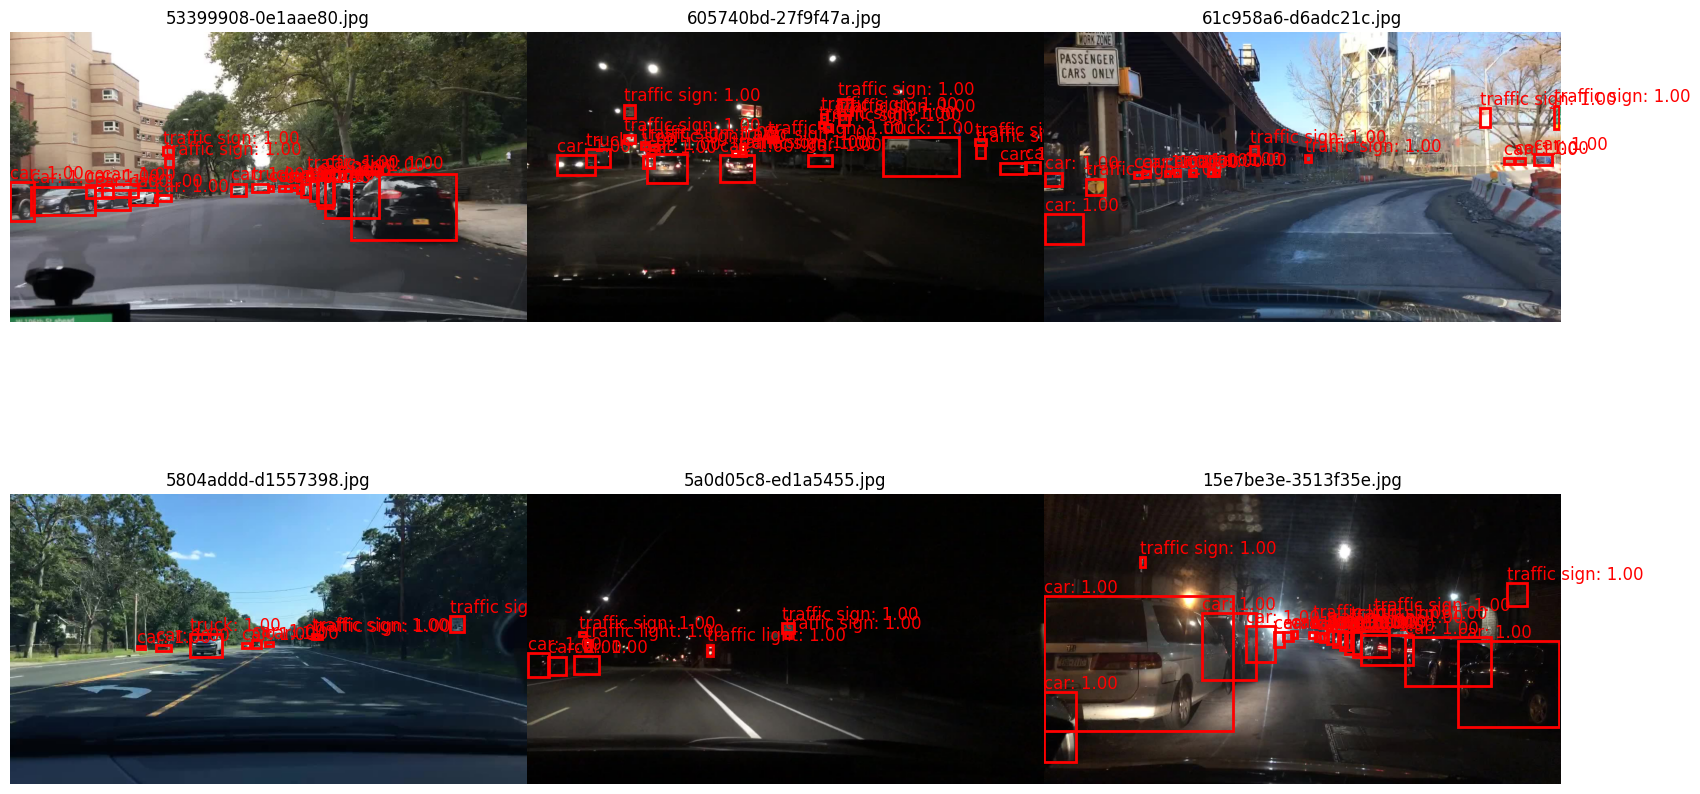

In [64]:
def visualize_validation_dataset_grid(image_dir, labels_data, classes, num_rows=1):
    """
    Visualizes a grid of images with bounding boxes and scores for each detected object.
    
    Args:
        image_dir (str): Directory containing images to visualize.
        labels_data (list): List of label data including bounding boxes and scores.
        classes (list): List of classes to include in visualization.
        num_rows (int): Number of rows in the visualization grid. The total number of images
                        will be num_rows * num_columns.
    """
    num_columns = 3
    num_images = num_rows * num_columns
    image_names = random.sample(os.listdir(image_dir), num_images)

    fig, axs = plt.subplots(num_rows, num_columns, figsize=(20, 5 * num_rows))
    fig.subplots_adjust(hspace=.5, wspace=.001)
    axs = axs.ravel()

    for i, image_name in enumerate(image_names):
        print(image_name)
        image_path = os.path.join(image_dir, image_name)
        image = Image.open(image_path)
        axs[i].imshow(image)

        # Matching labels for the current image
        image_labels = [label for label in labels_data if label["name"] == image_name]
        
        for label in image_labels:
            for obj in label["labels"]:
                category = obj["category"]
                if category not in classes:
                    continue  # Skip categories not in the specified classes
                box = obj.get("box2d", None)
                score = obj.get("score", 1)  # Default score to 1 if not available
                if box:
                    x1, y1, x2, y2 = box["x1"], box["y1"], box["x2"], box["y2"]
                    rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='r', facecolor='none')
                    axs[i].add_patch(rect)
                    # Display category and score
                    axs[i].text(x1, y1 - 10, f'{category}: {score:.2f}', fontsize=12, color='red')

        axs[i].axis('off')
        axs[i].set_title(image_name)

    plt.show()

labels_json_file = file_path_train
file_path = images_folder_train

#labels_json_file = file_path_valid 
#file_path = images_folder_val


with open(labels_json_file, 'r') as f:
    labels_data = json.load(f)

visualize_validation_dataset_grid(file_path, labels_data, classes, num_rows=2)


# 3.2. Specific image visualization

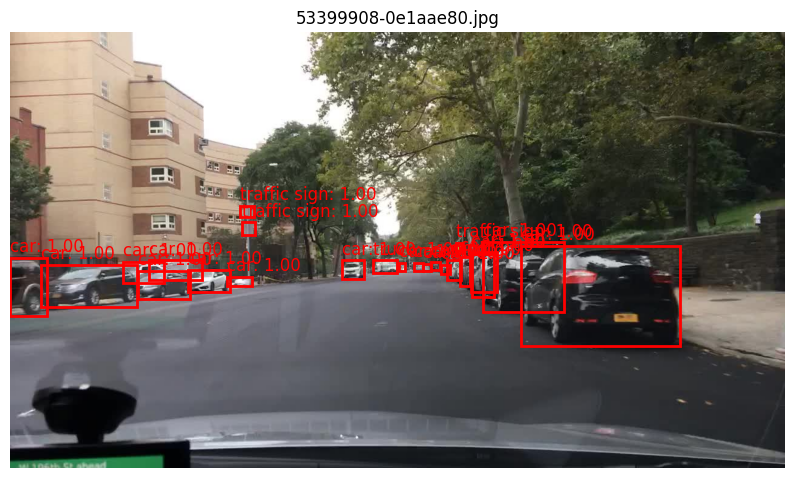

In [65]:
image_name = "53399908-0e1aae80.jpg"

def visualize_specific_image(image_dir, labels_data, image_name, classes):
    image_path = os.path.join(image_dir, image_name)
    if not os.path.exists(image_path):
        print(f"Image {image_name} not found in {image_dir}")
        return
    
    # Load and display the image
    image = Image.open(image_path)
    plt.figure(figsize=(10, 10))
    plt.imshow(image)

    # Find matching labels for the specific image
    image_labels = next((label for label in labels_data if label["name"] == image_name), None)
    if not image_labels:
        print(f"No labels found for image {image_name}.")
        return

    # Plot each bounding box, label, and score
    for obj in image_labels["labels"]:
        category = obj["category"]
        if category not in classes:  # Only interested in specific classes
            continue
        
        box = obj.get("box2d", None)
        score = obj.get("score", 1)  # Default score to 1 if not provided
        if box:
            x1, y1, x2, y2 = box["x1"], box["y1"], box["x2"], box["y2"]
            rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='r', facecolor='none')
            plt.gca().add_patch(rect)
            # Display category and score without background color
            plt.text(x1, y1 - 10, f'{category}: {score:.2f}', fontsize=12, color='red')

    plt.axis('off')
    plt.title(image_name)
    plt.savefig(image_name)
    plt.show()


 # Example classes
visualize_specific_image(file_path, labels_data, image_name, classes)


# 4. Check if dataset is imbalance w.r.t classes and samples
    1. Find the number of unique classes present in each image
    2. Histogram of frequency of classes overall: Train
    3. Histogram of number of images per class: Train
    4. Histogram of frquency of classes: Validation
    5. Histogram for number of number of images per class: Validation

# 4.1. Number of unique classes and type present in each image: VALIDATION

In [16]:
# Load the JSON data from train.json
with open(file_path_valid, "r") as file:
    train_data = json.load(file)
    
# Dictionary to store class counts for each image
image_class_counts = {}

# Iterate through the images in the folder
for item in train_data:
    image_name = item['name']
    labels = item.get('labels', [])
    
    # Extract class labels for the image
    class_labels = [label['category'] for label in labels]
    
    # Get unique class labels
    unique_class_labels = set(class_labels)
    
    # Store class counts for the image
    image_class_counts[image_name] = {
        'classes': unique_class_labels,
        'count': len(unique_class_labels)
    }

# Print the number of classes and the type of each image
for image_name, data in image_class_counts.items():
    print(f"Image: {image_name}, Number of Classes: {data['count']}, Classes: {data['classes']}")


Image: b1c66a42-6f7d68ca.jpg, Number of Classes: 7, Classes: {'traffic sign', 'rider', 'motor', 'traffic light', 'lane', 'car', 'drivable area'}
Image: b1c81faa-3df17267.jpg, Number of Classes: 5, Classes: {'traffic sign', 'traffic light', 'lane', 'car', 'drivable area'}
Image: b1c81faa-c80764c5.jpg, Number of Classes: 4, Classes: {'traffic sign', 'drivable area', 'car', 'lane'}
Image: b1c9c847-3bda4659.jpg, Number of Classes: 4, Classes: {'traffic sign', 'drivable area', 'car', 'lane'}
Image: b1ca2e5d-84cf9134.jpg, Number of Classes: 6, Classes: {'traffic sign', 'drivable area', 'traffic light', 'lane', 'car', 'person'}
Image: b1ca8418-84a133a0.jpg, Number of Classes: 6, Classes: {'traffic sign', 'motor', 'traffic light', 'lane', 'car', 'drivable area'}
Image: b1cac6a7-04e33135.jpg, Number of Classes: 3, Classes: {'car', 'drivable area', 'lane'}
Image: b1cd1e94-26dd524f.jpg, Number of Classes: 5, Classes: {'traffic sign', 'traffic light', 'lane', 'car', 'drivable area'}
Image: b1cd1e9

# 4.2. Histogram of frquency of classes: Train

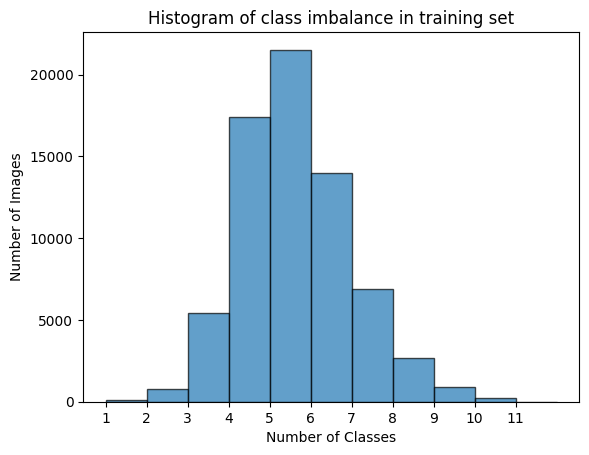

In [17]:
# Load the JSON data from train.json
with open(file_path_train, "r") as file:
    train_data = json.load(file)

# Lists to store the count of classes for each image
num_classes_per_image = []

# Iterate through the images in the data
for item in train_data:
    labels = item.get('labels', [])
    
    # Extract class labels for the image and count the number of unique classes
    num_classes = len(set(label['category'] for label in labels))
    
    # Append the number of classes for the current image to the list
    num_classes_per_image.append(num_classes)

# Plot histogram
plt.hist(num_classes_per_image, bins=range(1, max(num_classes_per_image) + 2), edgecolor='black', alpha=0.7)
plt.xlabel('Number of Classes')
plt.ylabel('Number of Images')
plt.title('Histogram of class imbalance in training set')
plt.xticks(range(1, max(num_classes_per_image) + 1))
plt.savefig('histogram_class_imbalance_train.png')  # Save the image
plt.show()

# 4.3. Histogram of number of images per class: Train

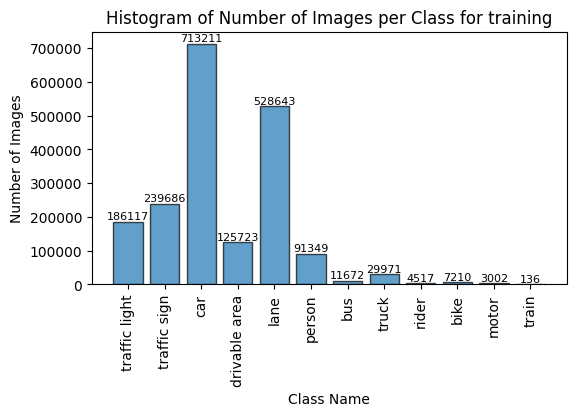

In [18]:
# Load the JSON data from train.json
with open(file_path_train, "r") as file:
    train_data = json.load(file)

# Dictionary to store the count of each class
class_counts = {}

# Iterate through the images in the data
for item in train_data:
    labels = item.get('labels', [])
    
    # Extract class labels for the image and count the occurrences of each class
    for label in labels:
        category = label.get('category')
        class_counts[category] = class_counts.get(category, 0) + 1

# Plot histogram
plt.bar(class_counts.keys(), class_counts.values(), edgecolor='black', alpha=0.7)
plt.xlabel('Class Name')
plt.ylabel('Number of Images')
plt.title('Histogram of Number of Images per Class for training')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Annotate each bar with its count
for i, count in enumerate(class_counts.values()):
    plt.text(i, count, str(count), ha='center', va='bottom', rotation=0, fontsize=8)


plt.tight_layout(pad=3.0)  # Adjust layout with increased padding
plt.savefig('histogram_no_images_per_class_train.png')  # Save the image
plt.show()

# 4.4. Histogram of frquency of classes: Validation

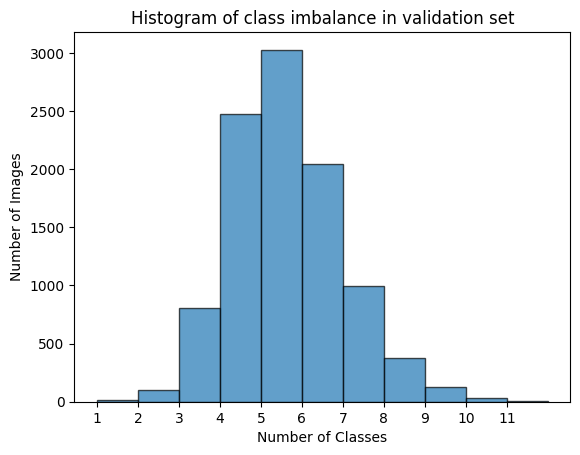

In [19]:
# Load the JSON data from train.json
with open(file_path_valid, "r") as file:
    valid_data = json.load(file)

# Lists to store the count of classes for each image
num_classes_per_image = []

# Iterate through the images in the data
for item in valid_data:
    labels = item.get('labels', [])
    
    # Extract class labels for the image and count the number of unique classes
    num_classes = len(set(label['category'] for label in labels))
    
    # Append the number of classes for the current image to the list
    num_classes_per_image.append(num_classes)

# Plot histogram
plt.hist(num_classes_per_image, bins=range(1, max(num_classes_per_image) + 2), edgecolor='black', alpha=0.7)
plt.xlabel('Number of Classes')
plt.ylabel('Number of Images')
plt.title('Histogram of class imbalance in validation set')
plt.xticks(range(1, max(num_classes_per_image) + 1))
plt.savefig('histogram_class_imbalance_valid.png')  # Save the image
plt.show()


# 4.5. Histogram for number of number of images per class: Validation

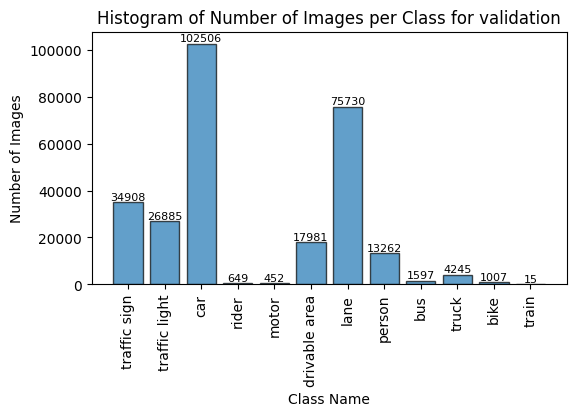

In [20]:
# Load the JSON data from train.json
with open(file_path_valid, "r") as file:
    valid_data = json.load(file)

# Dictionary to store the count of each class
class_counts = {}

# Iterate through the images in the data
for item in valid_data:
    labels = item.get('labels', [])
    
    # Extract class labels for the image and count the occurrences of each class
    for label in labels:
        category = label.get('category')
        class_counts[category] = class_counts.get(category, 0) + 1

# Plot histogram
plt.bar(class_counts.keys(), class_counts.values(), edgecolor='black', alpha=0.7)
plt.xlabel('Class Name')
plt.ylabel('Number of Images')
plt.title('Histogram of Number of Images per Class for validation')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Annotate each bar with its count
for i, count in enumerate(class_counts.values()):
    plt.text(i, count, str(count), ha='center', va='bottom', rotation=0, fontsize=8)

plt.tight_layout(pad=3.0)  # Adjust layout with increased padding
plt.savefig('histogram_no_images_per_class_valid.png')  # Save the image
plt.show()

# 5. Blur image detection
    1. Find images using Canny()library from cv2 under specific clarity_threshold
    2. Get number of images for each attributes w.r.t blur images: train & validation
    3. Plot histogram of blur image statistics w.r.t each attribute

# 5.1. Find images using Canny()library from cv2 under specific clarity_threshold

In [115]:
def image_clarity_score(image_path):
    """
    Compute an image clarity score using edge detection.
    Higher scores indicate more edges/clearer images.
    """
    image = cv2.imread(image_path, 0)  # Read image in grayscale
    edges = cv2.Canny(image,100,200)  # Perform Canny edge detection
    score = np.mean(edges)  # Use the mean value of edges as a clarity score
    return score

def find_unclear_images(directory, clarity_threshold=10):
    """
    Scan through all images in a directory, and list those with a clarity score below the threshold.
    """
    unclear_images = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(root, file)
                score = image_clarity_score(image_path)
                if score < clarity_threshold:
                    unclear_images.append(image_path)
                    #print(f"Unclear image found: {image_path}, Clarity Score: {score}")
    return unclear_images

# Example usage:

unclear_images_train = find_unclear_images(images_folder_train, clarity_threshold=10)# Train
unclear_images_test = find_unclear_images(images_folder_valid, clarity_threshold=10) #Valid

KeyboardInterrupt: 

In [45]:
print(f"Total unclear images found in train: {len(unclear_images_train)}/69863")
print(f"Total unclear images found in valid: {len(unclear_images_test)}/10000")

Total unclear images found in train: 41211/70000
Total unclear images found in valid: 5854/10000


# 5.2. Get number of images for each attributes w.r.t blur images: Train & validation

In [56]:
labels_path_train = file_path_train
labels_path_valid = file_path_valid

with open(labels_path_train, "r") as file:
    labels_data_train = json.load(file)

with open(labels_path_valid, "r") as file:
    labels_data_valid = json.load(file)
    
def get_attributes(image_path, labels_data):
    """
    Get the parameters of the attributes present in the image from the labels data.
    """
    image_name = os.path.basename(image_path)
    image_attributes = {}
    for item in labels_data:
        if item["name"] == image_name:
            image_attributes = item.get("attributes", {})
            break
    return image_attributes

def count_attribute_occurrences(unclear_images, labels_data):
    """
    Count the number of unclear images for each attribute.
    """
    weather_counts = { "rainy": 0, "snowy": 0, "clear": 0, "overcast": 0, "undefined": 0, "partly cloudy": 0, "foggy": 0 }
    scene_counts = { "tunnel": 0, "residential": 0, "parking lot": 0, "undefined": 0, "city street": 0, "gas stations": 0, "highway": 0 }
    timeofday_counts = { "daytime": 0, "night": 0, "dawn/dusk": 0, "undefined": 0 }

    for image_path in unclear_images:
        attributes = get_attributes(image_path, labels_data)
        weather = attributes.get("weather", "undefined")
        scene = attributes.get("scene", "undefined")
        timeofday = attributes.get("timeofday", "undefined")

        # Increment the count for each attribute
        weather_counts[weather] += 1
        scene_counts[scene] += 1
        timeofday_counts[timeofday] += 1

    return weather_counts, scene_counts, timeofday_counts

weather_counts_train, scene_counts_train, timeofday_counts_train = count_attribute_occurrences(unclear_images_train, labels_data_train)
weather_counts_valid, scene_counts_valid, timeofday_counts_valid = count_attribute_occurrences(unclear_images_test, labels_data_valid)

# Print the results

print(f"Total unclear images found in train: {len(unclear_images_train)}/69863")
# Print the results
print("Unclear Images by Weather:")
for weather, count in weather_counts_train.items():
    print(f"{weather.capitalize()}: {count}")

print("\nUnclear Images by Scene:")
for scene, count in scene_counts_train.items():
    print(f"{scene.capitalize()}: {count}")

print("\nUnclear Images by Time of Day:")
for timeofday, count in timeofday_counts_train.items():
    print(f"{timeofday.capitalize()}: {count}")
    
    
print(f"\n Total unclear images found in valid:{len(unclear_images_test)}/10000 ")
print("Unclear Images by Weather:")
for weather, count in weather_counts_valid.items():
    print(f"{weather.capitalize()}: {count}")

print("\nUnclear Images by Scene:")
for scene, count in scene_counts_valid.items():
    print(f"{scene.capitalize()}: {count}")

print("\nUnclear Images by Time of Day:")
for timeofday, count in timeofday_counts_valid.items():
    print(f"{timeofday.capitalize()}: {count}")

Total unclear images found in train: 41211/70000
Unclear Images by Weather:
Rainy: 3428
Snowy: 2801
Clear: 27325
Overcast: 3228
Undefined: 2674
Partly cloudy: 1639
Foggy: 116

Unclear Images by Scene:
Tunnel: 121
Residential: 3226
Parking lot: 193
Undefined: 386
City street: 24456
Gas stations: 12
Highway: 12817

Unclear Images by Time of Day:
Daytime: 10025
Night: 27573
Dawn/dusk: 3407
Undefined: 206

 Total unclear images found in valid:5854/10000 
Unclear Images by Weather:
Rainy: 478
Snowy: 354
Clear: 3892
Overcast: 494
Undefined: 373
Partly cloudy: 252
Foggy: 11

Unclear Images by Scene:
Tunnel: 26
Residential: 495
Parking lot: 24
Undefined: 47
City street: 3429
Gas stations: 4
Highway: 1829

Unclear Images by Time of Day:
Daytime: 1449
Night: 3875
Dawn/dusk: 498
Undefined: 32


# 5.3. Plot histogram of blur image statistics w.r.t each attribute

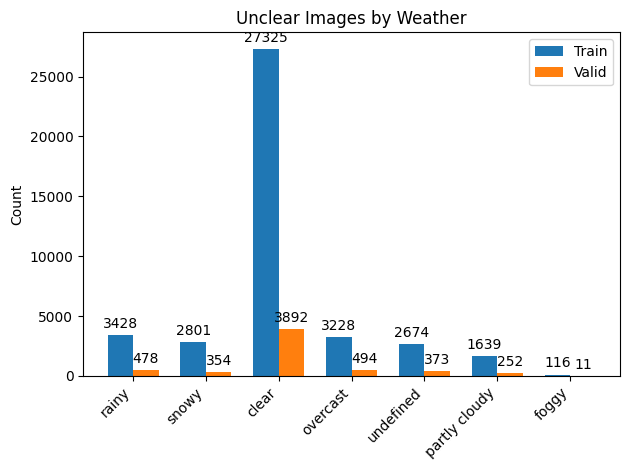

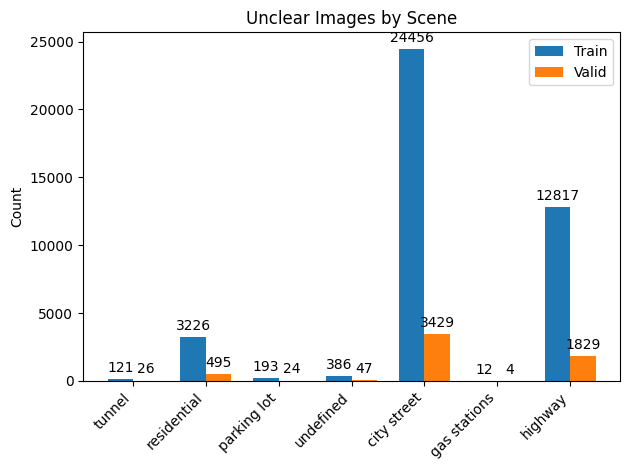

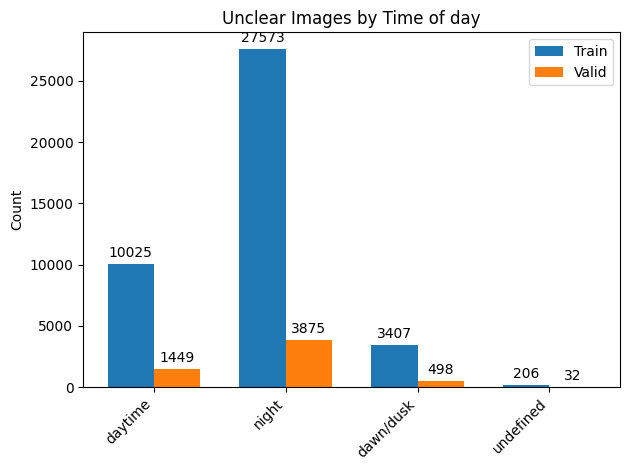

In [58]:
def plot_histogram(train_counts, valid_counts, attribute_name):
    attributes = list(train_counts.keys())
    train_values = list(train_counts.values())
    valid_values = list(valid_counts.values())

    x = range(len(attributes))
    width = 0.35

    fig, ax = plt.subplots()
    rects1 = ax.bar(x, train_values, width, label='Train')
    rects2 = ax.bar([i + width for i in x], valid_values, width, label='Valid')

    ax.set_ylabel('Count')
    ax.set_title(f'Unclear Images by {attribute_name.capitalize()}')
    ax.set_xticks([i + width/2 for i in x])
    ax.set_xticklabels(attributes, rotation=45, ha='right')  # Rotate labels by 45 degrees
    ax.legend()

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()

    plt.show()

# Plot histograms for weather
plot_histogram(weather_counts_train, weather_counts_valid, 'weather')

# Plot histograms for scene
plot_histogram(scene_counts_train, scene_counts_valid, 'scene')

# Plot histograms for time of day
plot_histogram(timeofday_counts_train, timeofday_counts_valid, 'time of day')


# 6. Find images where the trafficlightcolor is none for category traffic light.
    1. Images where category is traffic light but trafficlightcolor attribute is None: Train & Validatoin
    2. Dispaly those images with bounding boxes (BB)

# 6.1 Images where category is traffic light but trafficlightcolor attribute is None

In [21]:
# Load the JSON data for train and validation
with open(file_path_train, "r") as file:
    train_data = json.load(file)

with open(file_path_valid, "r") as file:
    valid_data = json.load(file)

# Counter to store the number of images where "traffic sign" is none
none_traffic_sign_count_train = 0
none_traffic_sign_count_valid = 0

# List to store the paths of images where "traffic sign" is none for train and validation
none_traffic_sign_images_train = []
none_traffic_sign_images_val = []

# Iterate through each image data for train
for item in train_data:
    labels = item.get('labels', [])
    for label in labels:
        if label['category'] == 'traffic light' and label['attributes'].get('trafficLightColor') == 'none':
            none_traffic_sign_images_train.append(item['name'])
            none_traffic_sign_count_train += 1
            break

# Iterate through each image data for validation
for item in valid_data:
    labels = item.get('labels', [])
    for label in labels:
        if label['category'] == 'traffic light' and label['attributes'].get('trafficLightColor') == 'none':
            none_traffic_sign_images_val.append(item['name'])
            none_traffic_sign_count_valid += 1
            break

#Print the number of images
print(f"The number of training images where the trafficLightColor is none: {none_traffic_sign_count_train}")
print(f"The number of validation images where the trafficLightColor is none: {none_traffic_sign_count_valid}")


The number of training images where the trafficLightColor is none: 20386
The number of validation images where the trafficLightColor is none: 2995


# 6.2. Display those images with bounding boxes

In [22]:
# Randomly select three images from train and validation sets
number_of_images = 3
random_images_train = random.sample(none_traffic_sign_images_train, number_of_images)
random_images_val = random.sample(none_traffic_sign_images_val, number_of_images)

# Function to display images with bounding boxes
def display_with_boxes(image_list, title, folder_name, data):
    plt.figure(figsize=(12, 4))
    for i, image_name in enumerate(image_list, 1):
        plt.subplot(1, 3, i)
        img = mpimg.imread(folder_name+"/"+image_name)  # Load the image
        plt.imshow(img)
        plt.title(image_name)
        plt.axis('on')
        found_label = False  # Flag to track if label is found for the current image
        # Load labels for the current image
        for item in data:
            if item['name'] == image_name:
                labels = item.get('labels', [])
                for label in labels:
                    if label['category'] == 'traffic light' and label['attributes'].get('trafficLightColor') != 'none':
                        # Extract bounding box coordinates
                        x1, y1, x2, y2 = label['box2d']['x1'], label['box2d']['y1'], label['box2d']['x2'], label['box2d']['y2']
                        print(f"Coordinates for {image_name}: x1={x1}, y1={y1}, x2={x2}, y2={y2}")
                        # Create a rectangle patch with red color and thick lines
                        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=3, edgecolor='r', facecolor='none')
                        # Add the rectangle patch to the current axis
                        plt.gca().add_patch(rect)
                        found_label = True  # Set flag to True since label is found
                        break  # Break to count only once per image
                break  # Break once labels for the current image are found
        if not found_label:
            print(f"No label found for {image_name}")
    plt.suptitle(title, fontsize=16)
    plt.show()

# Display images from train and validation sets with bounding boxes around traffic lights
display_images_with_boxes(random_images_train, 'Randomly Selected Images from Train Set', train_images_folder, train_data)
display_images_with_boxes(random_images_val, 'Randomly Selected Images from Validation Set', valid_images_folder, valid_data)


NameError: name 'display_images_with_boxes' is not defined

# 7. Check variation in image sizes
    1. Find mean and max width: Train and Validation
    2. Area covered by each class (mean, std and max): Validation
    3. Histogram for mean area covered w.r.t classes: Train and Validation
    4. Plot the mean and std of the area calculation. Train and validation

# 7.1. Find mean and max width: Train and Validation

In [23]:
# Folder paths for train and validation datasets
train_dataset_folder = images_folder_train
valid_dataset_folder = images_folder_val

def get_image_sizes(dataset_folder):
    return [(Image.open(os.path.join(dataset_folder, filename)).size) for filename in os.listdir(dataset_folder)
            if filename.endswith(('.jpg', '.png'))]

def calculate_stats(image_sizes):
    widths, heights = zip(*image_sizes)
    return {
        'mean_width': np.mean(widths),
        'mean_height': np.mean(heights),
        'min_width': np.min(widths),
        'max_width': np.max(widths),
        'min_height': np.min(heights),
        'max_height': np.max(heights)
    }

# Get image sizes for train and validation datasets
train_image_sizes = get_image_sizes(train_dataset_folder)
valid_image_sizes = get_image_sizes(valid_dataset_folder)

# Calculate statistics
train_stats = calculate_stats(train_image_sizes)
valid_stats = calculate_stats(valid_image_sizes)

# Print statistics
print("Train Dataset:")
print(f"Min Width: {train_stats['min_width']}, Max Width: {train_stats['max_width']}")
print(f"Min Height: {train_stats['min_height']}, Max Height: {train_stats['max_height']}")

print("\nValidation Dataset:")
print(f"Min Width: {valid_stats['min_width']}, Max Width: {valid_stats['max_width']}")
print(f"Min Height: {valid_stats['min_height']}, Max Height: {valid_stats['max_height']}")

Train Dataset:
Min Width: 1280, Max Width: 1280
Min Height: 720, Max Height: 720

Validation Dataset:
Min Width: 1280, Max Width: 1280
Min Height: 720, Max Height: 720


# 7.2. Area covered by each class (mean, std and max): Validation

In [24]:
# Assuming 'labels_json_file' is the path to your JSON file
labels_json_file =  file_path_valid

# Define the classes of interest
classes_of_interest = ['bus', 'traffic light', 'traffic sign', 'person', 'bike', 'truck', 'motor', 'car', 'train', 'rider']

# Initialize a dictionary to hold the area of bounding boxes for each class
area_by_class = {class_name: [] for class_name in classes_of_interest}

# Load the JSON data
with open(labels_json_file, 'r') as file:
    data = json.load(file)

# Process each entry in the dataset
for entry in data:
    for label in entry.get('labels', []):
        category = label.get('category')
        box2d = label.get('box2d')
        
        if category in classes_of_interest and box2d:
            # Calculate the area of the bounding box
            area = (box2d['x2'] - box2d['x1']) * (box2d['y2'] - box2d['y1'])
            area_by_class[category].append(area)

# Now, calculate a meaningful metric (standard deviation) to understand variation
variation_metrics = {}
for class_name, areas in area_by_class.items():
    if areas:  # Ensure there are areas to calculate the metric
        variation_metrics[class_name] = {
            'mean_area': np.mean(areas),
            'std_dev': np.std(areas),
            'min_area': np.min(areas),
            'max_area': np.max(areas),
            'count': len(areas)
        }

# Print the results
for class_name, metrics in variation_metrics.items():
    print(f"Class: {class_name}")
    print(f"Mean Area: {metrics['mean_area']:.2f}, Std Dev: {metrics['std_dev']:.2f}, Min: {metrics['min_area']:.2f}, Max: {metrics['max_area']:.2f}, Count: {metrics['count']}")
    print()

Class: bus
Mean Area: 33675.08, Std Dev: 66899.73, Min: 117.77, Max: 470194.56, Count: 1597

Class: traffic light
Mean Area: 497.50, Std Dev: 730.35, Min: 2.31, Max: 40551.35, Count: 26885

Class: traffic sign
Mean Area: 1193.51, Std Dev: 3159.84, Min: 3.98, Max: 105944.91, Count: 34908

Class: person
Mean Area: 2879.95, Std Dev: 7327.42, Min: 3.37, Max: 155240.17, Count: 13262

Class: bike
Mean Area: 5413.47, Std Dev: 9090.64, Min: 44.82, Max: 110214.81, Count: 1007

Class: truck
Mean Area: 27422.99, Std Dev: 59131.75, Min: 11.30, Max: 573985.04, Count: 4245

Class: motor
Mean Area: 7799.65, Std Dev: 16329.34, Min: 44.82, Max: 185101.98, Count: 452

Class: car
Mean Area: 9389.02, Std Dev: 24949.57, Min: 4.31, Max: 455712.64, Count: 102506

Class: train
Mean Area: 29394.24, Std Dev: 36492.26, Min: 890.37, Max: 118478.87, Count: 15

Class: rider
Mean Area: 5971.18, Std Dev: 13844.96, Min: 24.45, Max: 191065.28, Count: 649



# 7.3. Histogram for mean area covered w.r.t classes: Train and Validation

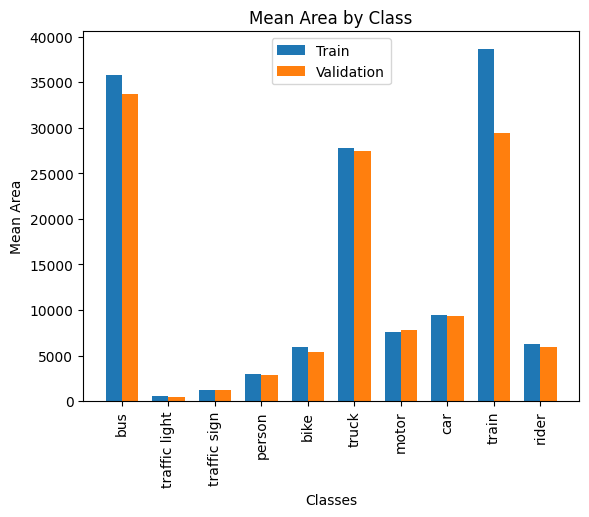

In [35]:
def extract_areas(labels_file, classes):
    areas = {cls: [] for cls in classes}
    
    with open(labels_file, 'r') as f:
        data = json.load(f)
    
    for item in data:
        for label in item['labels']:
            category = label['category']
            if category in classes:
                box = label['box2d']
                area = (box['x2'] - box['x1']) * (box['y2'] - box['y1'])
                areas[category].append(area)
                
    return areas

def calculate_statistics(areas):
    stats = {}
    for cls, area_list in areas.items():
        area_array = np.array(area_list)
        stats[cls] = {
            'mean': np.mean(area_array),
            'std': np.std(area_array),
            'min': np.min(area_array),
            'max': np.max(area_array)
        }
    return stats

def plot_stats(train_stats, test_stats, classes):
    x = np.arange(len(classes))
    width = 0.35

    train_means = [train_stats[cls]['mean'] for cls in classes]
    test_means = [test_stats[cls]['mean'] for cls in classes]

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, train_means, width, label='Train')
    rects2 = ax.bar(x + width/2, test_means, width, label='Validation')

    ax.set_xlabel('Classes')
    ax.set_ylabel('Mean Area')
    ax.set_title('Mean Area by Class')
    ax.set_xticks(x)
    ax.set_xticklabels(classes, rotation='vertical')
    ax.legend()

    # Save the figure
    plt.savefig('mean_area,jpg', bbox_inches='tight')
    plt.show()

train_labels_file = file_path_train
labels_json_file  = file_path_valid

train_areas = extract_areas(train_labels_file, classes)
test_areas = extract_areas(labels_json_file, classes)

train_stats = calculate_statistics(train_areas)
validation_stats = calculate_statistics(test_areas)

plot_stats(train_stats, validation_stats, classes)


# 7.4. Plot the mean and std of the area calculation: Train and validation

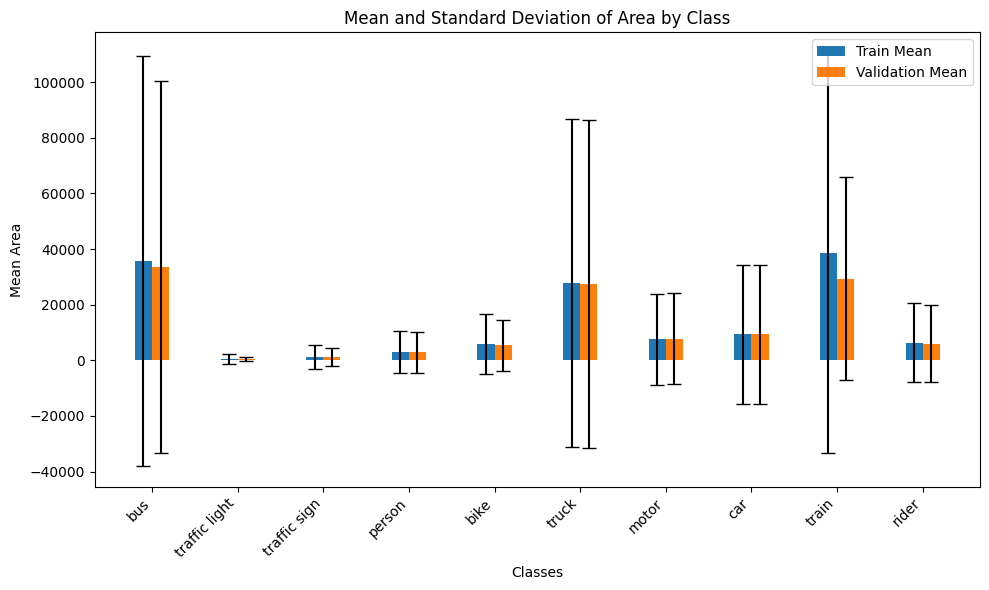

In [36]:
def calculate_area_stats(json_file, classes):
    with open(json_file) as f:
        data = json.load(f)

    stats = {cls: [] for cls in classes}  # Initialize stats dict

    for item in data:
        for label in item.get("labels", []):
            category = label.get("category")
            if category in classes:
                box = label.get("box2d")
                if box:  # Ensure box exists
                    area = (box["x2"] - box["x1"]) * (box["y2"] - box["y1"])
                    stats[category].append(area)

    # Convert lists to more detailed stats
    for cls, areas in stats.items():
        area_array = np.array(areas)
        stats[cls] = {
            'mean': np.mean(area_array),
            'std': np.std(area_array),
            'min': np.min(area_array),
            'max': np.max(area_array)
        }

    return stats

def plot_mean_std(train_stats, validation_stats, classes, save_path='mean_std_plot.png'):
    x = np.arange(len(classes))  # the label locations
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots(figsize=(10, 6))
    train_means = [train_stats[cls]['mean'] for cls in classes]
    train_stds = [train_stats[cls]['std'] for cls in classes]
    test_means = [test_stats[cls]['mean'] for cls in classes]
    validation_stats = [test_stats[cls]['std'] for cls in classes]

    rects1 = ax.bar(x - width/2, train_means, width, label='Train Mean', yerr=train_stds, capsize=5)
    rects2 = ax.bar(x + width/2, test_means, width, label='Validation Mean', yerr=validation_stats, capsize=5)

    ax.set_xlabel('Classes')
    ax.set_ylabel('Mean Area')
    ax.set_title('Mean and Standard Deviation of Area by Class')
    ax.set_xticks(x)
    ax.set_xticklabels(classes, rotation=45, ha='right')
    ax.legend(loc='upper right')

    fig.tight_layout()
    plt.savefig(save_path, bbox_inches='tight')
    plt.show()


# Calculate stats for both train and test datasets
train_labels_file = file_path_train
validation_json_file =  file_path_valid

train_stats = calculate_area_stats(train_labels_file, classes)
validation_stats = calculate_area_stats(validation_json_file, classes)

# Plot the mean and standard deviation for the calculated stats
plot_mean_std(train_stats, validation_stats, classes, 'mean_std_plot.png')
